Mapas autoorganizados (SOM)

Necesitamos isntalar la libreria minisom pip install minisom

In [1]:
#pip install minisom

#Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show
from minisom import MiniSom
from sklearn.preprocessing import scale
from sklearn import datasets

#Cargamos los datos, escalamos y damos nombres a las variables
iris = datasets.load_iris()
X = iris.data   
Y = iris.target
X = scale(X)  # Escalamos los datos 
variables= ['Longitud del Sépalo', 'Anchura del Sépalo',
            'Longitud del Pétalo', 'Anchura del Pétalo']

#Entrenamos el mapa
size = 15  # Tamaño del mapa
som = MiniSom(size, size, len(X[0]), neighborhood_function="gaussian", sigma=1.5, random_seed=111)
som.pca_weights_init(X)
som.train(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1879794846136173


c:\Users\gcarb\anaconda3\envs\AED_v05\lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


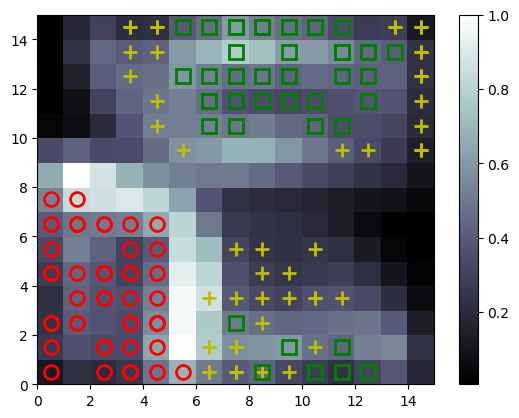

In [3]:
bone()  # Preparamos el gráfico
pcolor(som.distance_map().T)  # Mapa de distancias
colorbar()  # Barra de color
markers = ['o', '+', 's']  # Marcadores para las clases
colors = ['r', 'y', 'g']  # Colores para las clases
for i, x in enumerate(X):
    BMU = som.winner(x)  # Obtenemos la posición del ganador
    plot(BMU[0] + 0.5, BMU[1] + 0.5, markers[Y[i]], markerfacecolor='None', 
         markeredgecolor=colors[Y[i]], markersize=10, markeredgewidth=2)

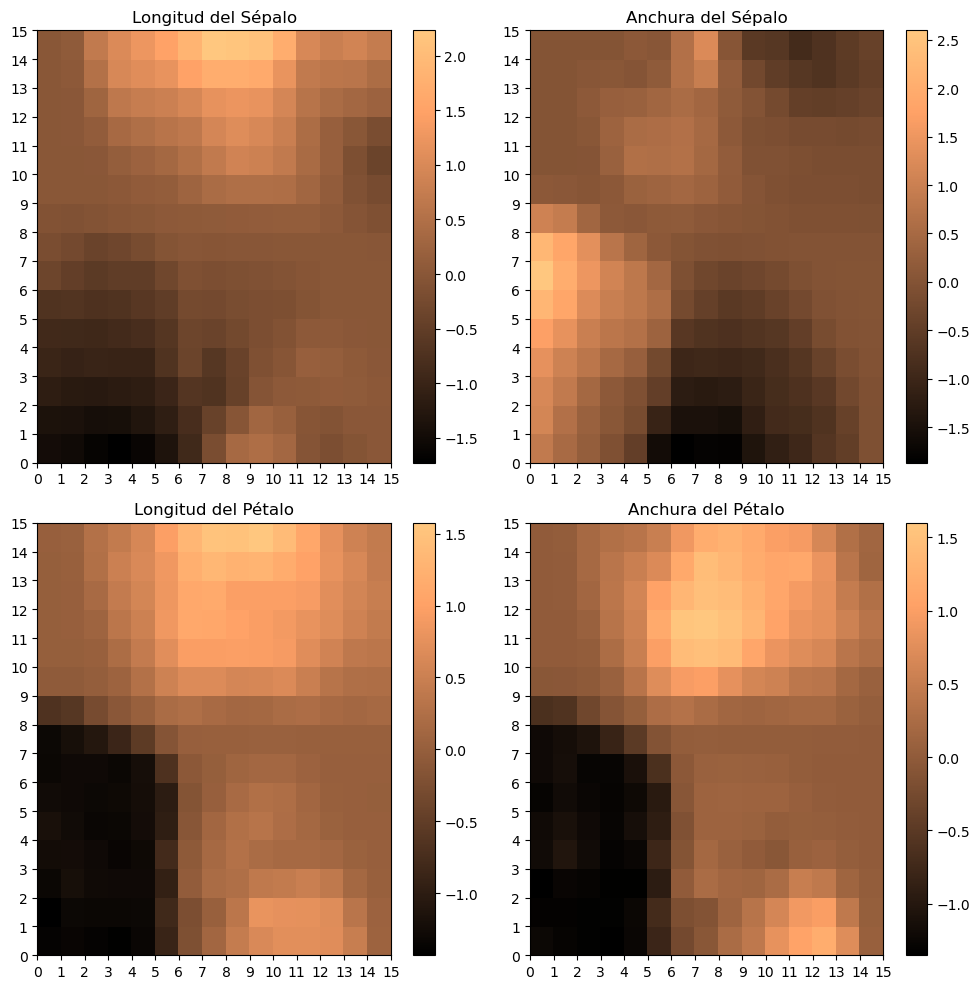

In [7]:
w = som.get_weights()  # Obtenemos los pesos del mapa
plt.figure(figsize=(10, 10))
for i, f in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    plt.pcolor(w[:, :, i].T, cmap='copper')  # Mapa de pesos
    plt.colorbar()
    plt.title(f)  # Título de la variable
    plt.xticks(np.arange(size+1))  # Quitamos las marcas del eje x
    plt.yticks(np.arange(size+1))  # Quitamos las marcas del eje y
    
plt.tight_layout()  # Ajustamos el layout
plt.show()  # Mostramos el gráfico
   